<a href="https://colab.research.google.com/github/Hydenx2004/Time-series-lab/blob/main/Experiment5ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

data = {'Time': pd.date_range(start='2023-01-01', periods=10, freq='D'),
        'Value': [10, 12, 15, 14, 16, 18, 20, 19, 22, 25]}
df = pd.DataFrame(data)
df = df.set_index('Time')

In [14]:
upsampled_df = df.resample('6H').asfreq()

<ipython-input-14-713d6aec7c76>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  upsampled_df = df.resample('6H').asfreq()


In [16]:
upsampled_linear = upsampled_df.interpolate(method='linear')
upsampled_spline = upsampled_df.interpolate(method='spline', order=2)
upsampled_spline[:5]

,Value
Time,
2023-01-01 00:00:00,10.000000
2023-01-01 06:00:00,11.012405
2023-01-01 12:00:00,11.336742
2023-01-01 18:00:00,11.663920
2023-01-02 00:00:00,12.000000


In [17]:
downsampled_df = df.resample('2D').mean()
downsampled_df.head()

,Value
Time,
2023-01-01,11.0
2023-01-03,14.5
2023-01-05,17.0
2023-01-07,19.5
2023-01-09,23.5


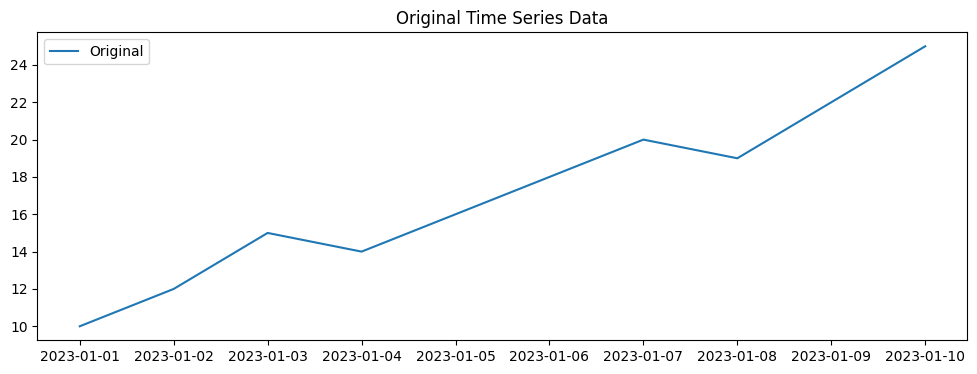

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['Value'], label='Original')
plt.title('Original Time Series Data')
plt.legend()

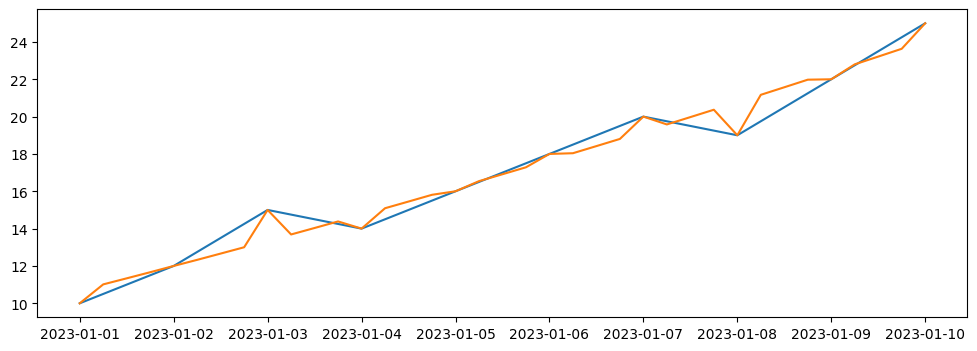

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(upsampled_linear.index, upsampled_linear['Value'], label='Linear Interpolation')
plt.plot(upsampled_spline.index, upsampled_spline['Value'], label='Spline Interpolation')

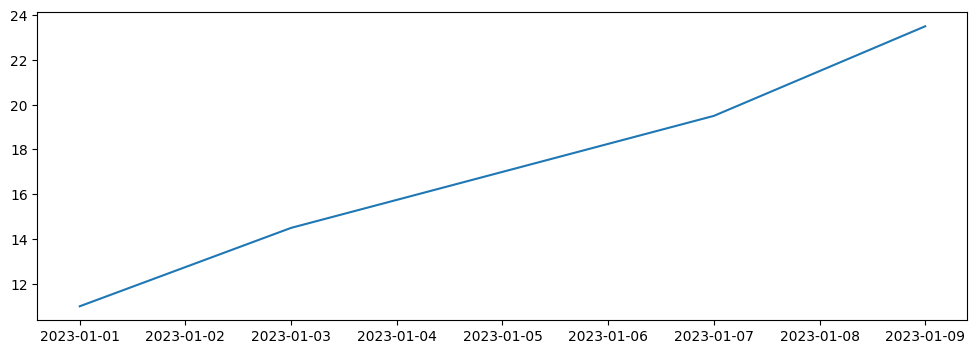

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(downsampled_df.index, downsampled_df['Value'], label='Downsampled (Mean)')